In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import gc

In [2]:
ls -lh '/kaggle/input/playground-series-s4e9'

total 46M
-rw-r--r-- 1 nobody nogroup 2.1M Sep  1 00:02 sample_submission.csv
-rw-r--r-- 1 nobody nogroup  18M Sep  1 00:02 test.csv
-rw-r--r-- 1 nobody nogroup  27M Sep  1 00:02 train.csv


In [3]:
train_data= pd.read_csv("/kaggle/input/playground-series-s4e9/train.csv", index_col="id")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e9/test.csv", index_col="id")
submission = pd.read_csv("/kaggle/input/playground-series-s4e9/sample_submission.csv")

In [4]:
from IPython.display import display_html
df1_styler = train_data.head().style.set_table_attributes("style='display:inline'").set_caption('Head Train Data').background_gradient(cmap='plasma')
df2_styler = test_data.head().style.set_table_attributes("style='display:inline'").set_caption('Head Test Data').background_gradient(cmap='plasma')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw = True)

Head Train Data 
 
 
   
 brand 
 model 
 model_year 
 milage 
 fuel_type 
 engine 
 transmission 
 ext_col 
 int_col 
 accident 
 clean_title 
 price 
 
 
 id 
   
   
   
   
   
   
   
   
   
   
   
   
 
 
 
 
 0 
 MINI 
 Cooper S Base 
 2007 
 213000 
 Gasoline 
 172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel 
 A/T 
 Yellow 
 Gray 
 None reported 
 Yes 
 4200 
 
 
 1 
 Lincoln 
 LS V8 
 2002 
 143250 
 Gasoline 
 252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel 
 A/T 
 Silver 
 Beige 
 At least 1 accident or damage reported 
 Yes 
 4999 
 
 
 2 
 Chevrolet 
 Silverado 2500 LT 
 2002 
 136731 
 E85 Flex Fuel 
 320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability 
 A/T 
 Blue 
 Gray 
 None reported 
 Yes 
 13900 
 
 
 3 
 Genesis 
 G90 5.0 Ultimate 
 2017 
 19500 
 Gasoline 
 420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel 
 Transmission w/Dual Shift Mode 
 Black 
 Black 
 None reported 
 Yes 
 45000 
 
 
 4 
 Mercedes-Benz 
 Metris Base 
 2021 
 7388 
 Gasoline 
 208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel 
 7-Speed A/T 
 Black 
 Beige 
 None reported 
 Yes 
 97500 
 
 
 

 
 Head Test Data 
 
 
   
 brand 
 model 
 model_year 
 milage 
 fuel_type 
 engine 
 transmission 
 ext_col 
 int_col 
 accident 
 clean_title 
 
 
 id 
   
   
   
   
   
   
   
   
   
   
   
 
 
 
 
 188533 
 Land 
 Rover LR2 Base 
 2015 
 98000 
 Gasoline 
 240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel 
 6-Speed A/T 
 White 
 Beige 
 None reported 
 Yes 
 
 
 188534 
 Land 
 Rover Defender SE 
 2020 
 9142 
 Hybrid 
 395.0HP 3.0L Straight 6 Cylinder Engine Gasoline/Mild Electric Hybrid 
 8-Speed A/T 
 Silver 
 Black 
 None reported 
 Yes 
 
 
 188535 
 Ford 
 Expedition Limited 
 2022 
 28121 
 Gasoline 
 3.5L V6 24V PDI DOHC Twin Turbo 
 10-Speed Automatic 
 White 
 Ebony 
 None reported 
 nan 
 
 
 188536 
 Audi 
 A6 2.0T Sport 
 2016 
 61258 
 Gasoline 
 2.0 Liter TFSI 
 Automatic 
 Silician Yellow 
 Black 
 None reported 
 nan 
 
 
 188537 
 Audi 
 A6 2.0T Premium Plus 
 2018 
 59000 
 Gasoline 
 252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel 
 A/T 
 Gray 
 Black 
 None reported 
 Yes

In [5]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['#missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [6]:
summary(train_data).style.background_gradient(cmap='plasma')

data shape: (188533, 12)


,data type,#missing,#unique,min,max,first value,second value,third value
brand,object,0.000000,57,nan,nan,MINI,Lincoln,Chevrolet
model,object,0.000000,1897,nan,nan,Cooper S Base,LS V8,Silverado 2500 LT
model_year,int64,0.000000,34,1974.000000,2024.000000,2007,2002,2002
milage,int64,0.000000,6651,100.000000,405000.000000,213000,143250,136731
fuel_type,object,2.696080,7,nan,nan,Gasoline,Gasoline,E85 Flex Fuel
engine,object,0.000000,1117,nan,nan,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability
transmission,object,0.000000,52,nan,nan,A/T,A/T,A/T
ext_col,object,0.000000,319,nan,nan,Yellow,Silver,Blue
int_col,object,0.000000,156,nan,nan,Gray,Beige,Gray
accident,object,1.300568,2,nan,nan,None reported,At least 1 accident or damage reported,None reported


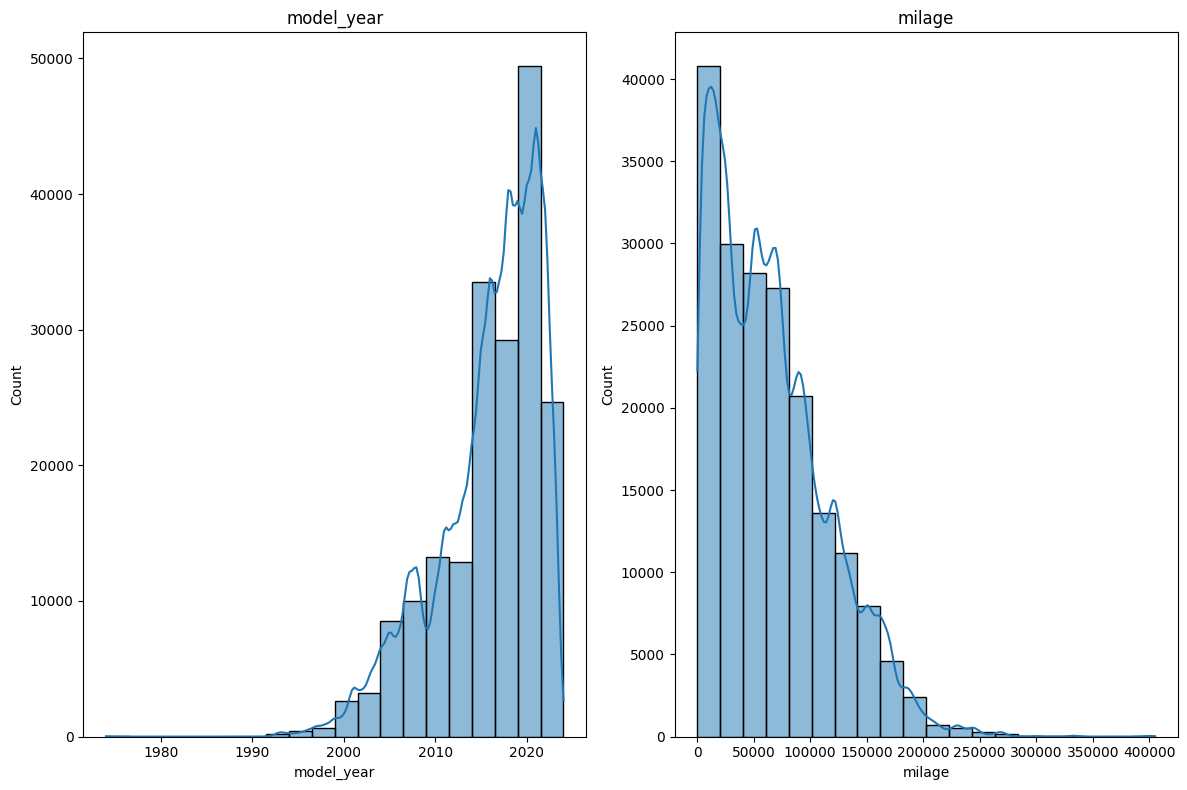

In [7]:
col_features = ['model_year', 'milage']

plt.figure(figsize=(12,8))
for feature in col_features:
    plt.subplot(1, 2, col_features.index(feature) +1)
    sns.histplot(data=train_data[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

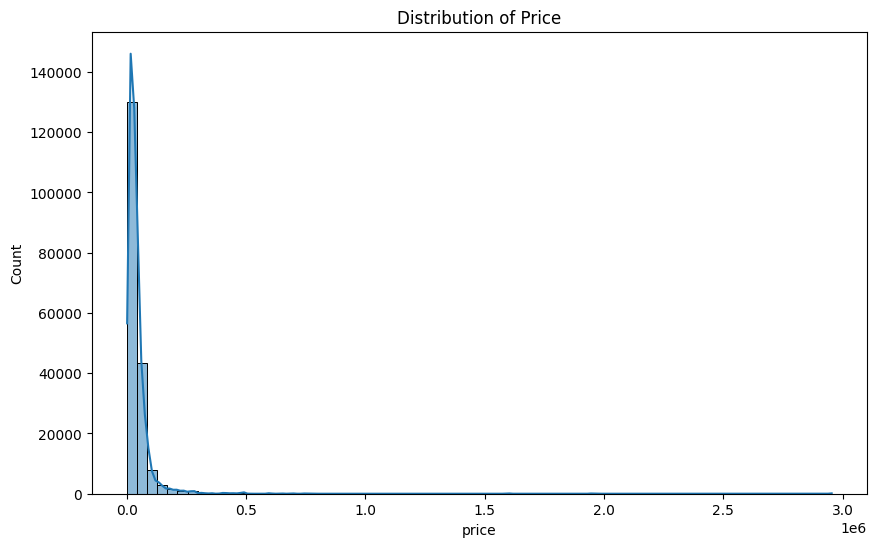

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data = train_data['price'], bins=70, kde = True)
plt.title('Distribution of Price')
plt.show()

In [9]:
train_data. columns[train_data.dtypes == 'object']

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')

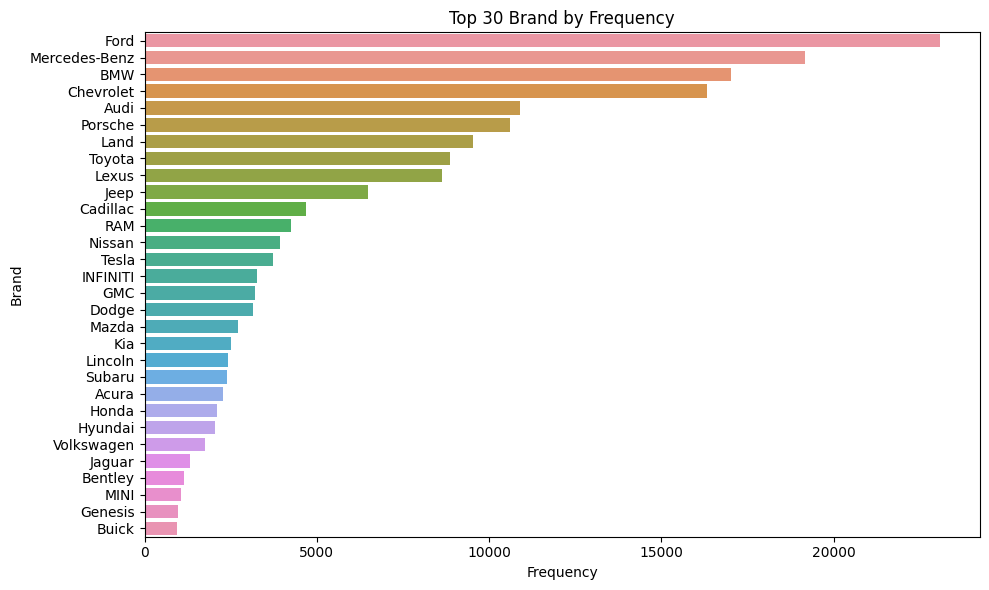

In [10]:
n = 30
top_brand = train_data['brand'].value_counts().head(n)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brand.values, y=top_brand.index)
plt.title(f'Top {n} Brand by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

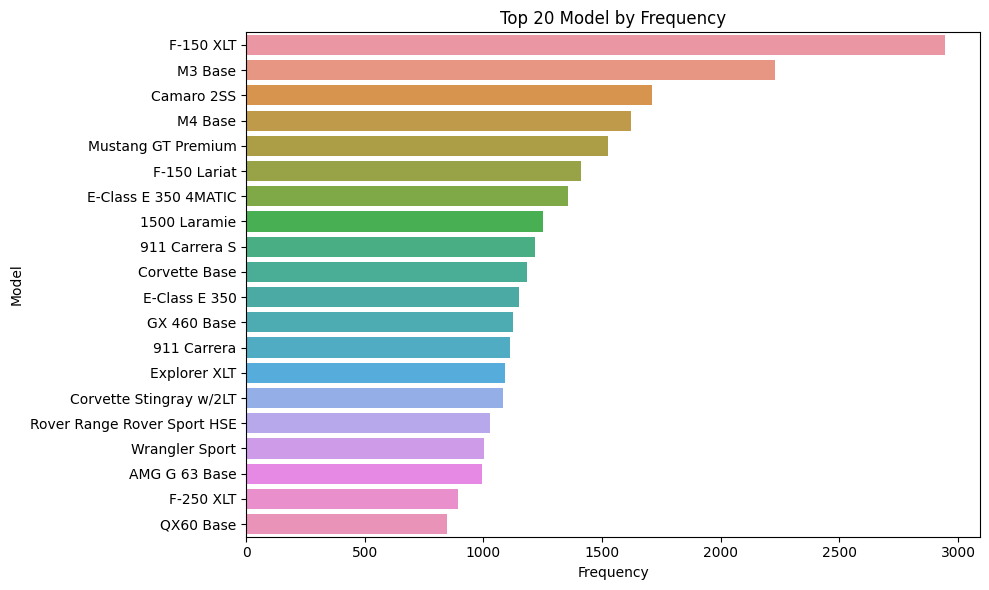

In [11]:
n = 20
top_model = train_data['model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_model.values, y=top_model.index)
plt.title(f'Top {n} Model by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Model')
plt.tight_layout()
plt.show()

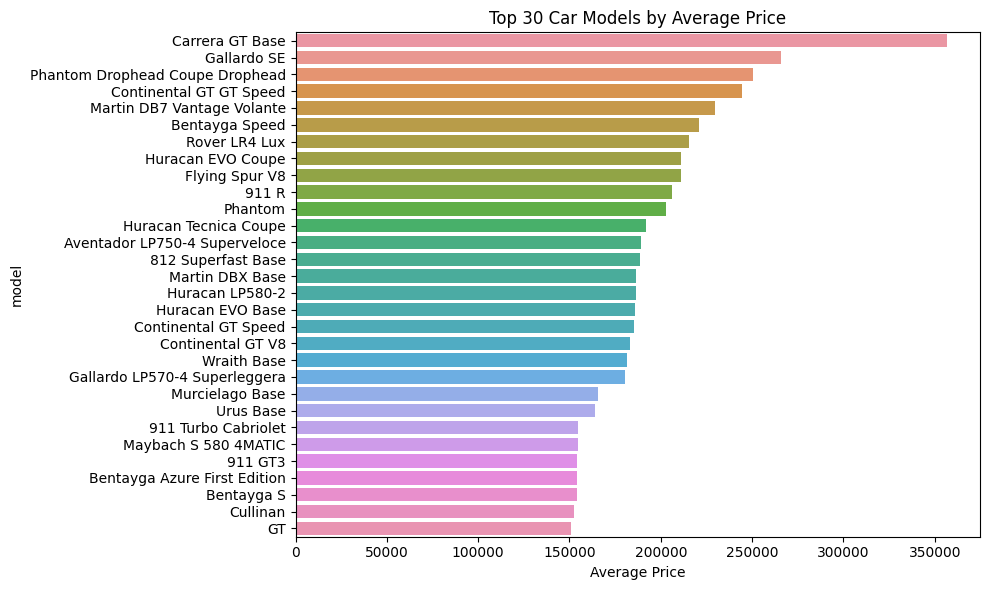

In [12]:
avg_prices_by_car = train_data.groupby('model')['price'].mean().sort_values(ascending=False)

n=30
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.tight_layout()
plt.show()

In [13]:
%%time
transmission_replacements = {
    '10-Speed Automatic': '10-Speed A/T',
    '8-Speed Automatic': '8-Speed A/T',
    '9-Speed Automatic': '9-Speed A/T',
    'Automatic': 'A/T',
    '4-Speed Automatic': '4-Speed A/T',
    '1-Speed Automatic': '1-Speed A/T',
    'Automatic CVT': 'Variable',
    'Transmission Overdrive Switch': 'A/T',
    '8-Speed Automatic with Auto-Shift': '8-Speed A/T',
    '8-SPEED AT': '8-Speed A/T',
    '8-Speed Manual': '8-Speed M/T',
    '7-Speed': '7-Speed A/T',
    '7-Speed Manual': '7-Speed M/T',
    '7-Speed Automatic': '7-Speed A/T',
    '7-Speed DCT Automatic': '7-Speed A/T',
    '7-Speed Automatic with Auto-Shift': '7-Speed A/T',
    'CVT Transmission': 'Variable',
    '9-Speed Automatic with Auto-Shift': '9-Speed A/T',
    '6-Speed Automatic with Auto-Shift': '6-Speed A/T',
    '6 Speed Mt': '6-Speed M/T',
    '6-Speed Electronically Controlled Automatic with O': '6-Speed A/T',
    '6-Speed Manual': 'M/T',
    '6 Speed At/Mt': 'Transmission w/Dual Shift Mode',
    '6-Speed Automatic': '6-Speed A/T',
    'F': 'Variable',
    'CVT-F': 'Variable',    'Manual': 'M/T',
    '5-Speed Automatic': '5-Speed A/T',
    '2-Speed Automatic': '2-Speed A/T',
    '10-Speed Automatic with Overdrive': '10-Speed A/T',
    'SCHEDULED FOR OR IN PRODUCTION': 'NN',
    '6-Speed': 'NN',
    'Transmission Overdrive Switch': 'NN',
    '2': 'NN',
    '–': 'NN'   
}

train_data['main_transmission'] = train_data['transmission']
test_data['main_transmission'] = test_data['transmission']

train_data['main_transmission'] = train_data['main_transmission'].replace(transmission_replacements)
test_data['main_transmission'] = test_data['main_transmission'].replace(transmission_replacements)

CPU times: user 667 ms, sys: 5 µs, total: 667 ms
Wall time: 667 ms


In [14]:
%%time
int_replacemnets = {
    'Medium Earth Gray' : 'Gray',
    'Diesel Gray / Black': 'Gray',
    'Dark Ash': 'Gray',
    'Graphite': 'Gray',
    'Dark Galvanized': 'Charcoal',
    'Light Gray': 'Gray',
    'Ash': 'Gray',
    'Jet Black': 'Black',
    'Global Black': 'Black',
    'Black Onyx': 'Black',
    'Parchment.': 'Beige',
    'Sardar Brown': 'Brown',
    'Black/Gun Metal': 'Black',
    'Charcoal Black': 'Charcoal',
    'Ebony': 'Brown',
    'Ebony Black': 'Black',
    'Carbon Black': 'Black',
    'Obsidian Black': 'Black',
    'Black / Saddle Brown': 'Black',
    'Black/Saddle Brown': 'Black',
    'Black / Brown': 'Black',
    'Saddle Brown': 'Brown',
    'Sand Beige': 'Beige',
    'Camel': 'Beige',
    'Parchment': 'Beige',
    'Macchiato Beige/Black': 'Beige',
    'Silk Beige/Espresso Brown': 'Beige',
    'Canberra Beige': 'Beige',
    'Macchiato': 'Beige',
    'Almond Beige': 'Beige',
    'Grace White': 'White',
    'Ivory / Ebony': 'White',
    'Bianco Polar': 'White',
    'White / Brown': 'White',
    'Platinum': 'White',
    'Cloud': 'Blue',
    'Rift Metallic': 'White',
    'Light Platinum / Jet Black': 'Silver',
    'Billet Clearcoat Metallic': 'Silver',
    'Sakhir Orange': 'Orange',
    'Pimento Red w/Ebony': 'Red',
    'Adrenaline Red': 'Red',
    'Rioja Red': 'Red',
    'Classic Red': 'Red',
    'Magma Red': 'Red',
    'Cobalt Blue': 'Blue',
    'Tempest': 'Blue',
    'Stormy Sea': 'Blue',
    'Navy Pier': 'Blue',
    'Charles Blue': 'Blue',
    'Rhapsody Blue': 'Blue',
    'Kyalami Orange': 'Orange',
    'Sakhir Orange/Black': 'Orange',
    'Dark Gray': 'Gray',
    'Deep Garnet': 'Red',
    'Scarlet Ember': 'Red',
    'Beluga': 'Blue',
    'Chestnut': 'Brown',
    'Boulder': 'Gray',
    'Macchiato/Magmagrey': 'Beige',
    'Medium Stone': 'Gray',
    'BLACK': 'Black',
    'Portland': 'Gray',
    'Sandstone': 'Beige',
    'Slate': 'Gray',
    'Cappuccino': 'Brown',
    'Oyster W/Contrast': 'Beige',
    'Nero Ade': 'Black',
    'Light Titanium': 'Silver',
    'Tan': 'Beige',
    'Brandy': 'Brown',
    'Amber': 'Yellow',
    'Hotspur': 'Blue',
    'Chateau': 'Green',
    'Ice': 'Blue',
    'Blk': 'Black',
    'Mesa': 'Brown',
    'Espresso': 'Brown',
    'Ceramic': 'White',
    'Medium Dark Slate': 'Gray',
    'Graphite w/Gun Metal': 'Gray',
    'Cocoa / Dune': 'Brown',
    'Roast': 'Brown',
    'Hotspur Hide': 'Brown',
    'ORANGE': 'Orange',
    'Walnut': 'Brown',
    'Caramel': 'Beige',
    'Giallo Taurus / Nero Ade': 'Yellow',
    'Medium Pewter': 'Gray',
    'Camel Leather': 'Brown',
    'Anthracite': 'Gray',
    'Mocha': 'Brown',
    'Sahara Tan': 'Beige',
    'Porpoise': 'Beige',
    'Deep Cypress': 'Green',
    'Light Slate': 'Gray',
    'Beluga Hide': 'Black',
    'Tupelo': 'Green',
    'Gideon': 'Beige',
    'Medium Light Camel': 'Beige',
    'Nero': 'Black',
    'Deep Chestnut': 'Red',
    'Dark Auburn': 'Brown',
    'Shale': 'Gray',
    'BEIGE': 'Beige',
    'Linen': 'Beige',
    'WHITE': 'White',
    'Tension': 'Blue',
    'Sport': 'Red',
    'Very Light Cashmere': 'Beige'
}

train_data['main_int_color'] = train_data['int_col']
test_data['main_int_color'] = test_data['int_col']

train_data['main_int_color'] = train_data['main_int_color'].replace(int_replacemnets)
test_data['main_int_color'] = test_data['main_int_color'].replace(int_replacemnets)

CPU times: user 2.1 s, sys: 55 µs, total: 2.1 s
Wall time: 2.1 s


In [15]:
keywords = ['Black', 'Brown', 'Beige', 'Gray', 'Brown','White','Red', 'Blue', 'Yellow', 'Ebony', 'Green','Orange','Gold','Silver','Charcoal']

def assign_main_color(int_col):
    ext_col = int_col.replace('Grey', 'Gray')
    for keyword in keywords:
        if keyword in int_col:
            return keyword
    return 'NN'

train_data['main_int_color'] = train_data['main_int_color'].apply(assign_main_color)
test_data['main_int_color'] = test_data['main_int_color'].apply(assign_main_color)

In [16]:
%%time
ext_replacements = {
    'Blu': 'Blue',
    'BLUE': 'Blue',
    'Glacier': 'Blue',
    'BLU ELEOS': 'Blue',
    'Dark Sapphire': 'Navy',
    'Tangerine': 'Orange',
    'Pumpkin': 'Orange',
    'Clementine': 'Orange',
    'Granite': 'Gray',
    'Go Mango!': 'Yellow',
    'Onyx': 'Black',
    'Gecko Pearlcoat': 'Green',
    'Obsidian': 'Black',
    'Metallic': 'Silver',
    'Grigio Nimbus': 'Silver',
    'Chalk': 'White',
    'Bianco Monocerus': 'White',
    'Verde': 'Green',
    'Dark Graphite Metallic': 'Gray',
    'BLACK': 'Black',
    'Dark Moss': 'Green',
    'Granite Crystal Clearcoat Metallic': 'Gray',
    'Ebony Twilight Metallic': 'Black',
    'Satin Steel Metallic': 'Silver',
    'Magnetic Metallic': 'Gray',
    'Dark Matter Metallic': 'Gray',
    'Dark Ash Metallic': 'Gray',
    'Iridium Metallic': 'Gray',
    'Nightfall Mica': 'Navy',
    'Sandstone Metallic': 'Beige',
    'Rift Metallic': 'White',
    'Billet Clearcoat Metallic': 'Silver',
    'Tan': 'Beige',
    'Ice': 'Blue',
    'Hellayella': 'Yellow',
    'Granite': 'Gray',
    'Yulong': 'White',
    'Blueprint': 'Navy',
    'Arancio Borealis': 'Orange',
    'Hellayella Clearcoat': 'Yellow',
    'Moonlight Cloud': 'Navy',
    'Liquid Platinum': 'Silver',
    'Gun Metallic': 'Gray',
    'Manhattan Noir Metallic': 'Gray',
    'Lavender': 'Purple',
    'Violet': 'Purple',
    'Pink': 'Purple',
    'Mauve': 'Plum',
    'Tempest': 'Blue',
    'Nero Daytona': 'Black',
    'Scarlet Ember': 'Red',
    'Infrared Tintcoat': 'Red',
    'Maximum Steel Metallic': 'Gray',
    'Ember Pearlcoat': 'Brown',
    'Rich Garnet Metallic': 'Brown',
    'Tungsten Metallic': 'Gray',
    'Nero Noctis': 'Black',
    'Platinum Quartz Metallic': 'White',
    'Ruby Flare Pearl': 'Red',
    'Bianco Icarus Metallic': 'White',
    'Stormy Sea': 'Blue',
    'Mountain Air Metallic': 'Blue',
    'Wind Chill Pearl': 'White',
    'Iridescent Pearl Tricoat': 'White',
    'Black Cherry': 'Plum',
    'Black Forest Green': 'Green',
    'Maroon': 'Red',
    'Rosso': 'Red',
    'Rosso Corsa': 'Red',
    'Rosso Mars Metallic': 'Red',
    'Quicksilver Metallic': 'Silver',
    'Designo Magno Matte': 'Gray',
    'Granite Crystal Metallic Clearcoat': 'Gray',
    'Bianco Isis': 'White',
    'Sunset Drift Chromaflair': 'Orange',
    'Ametrin Metallic': 'Plum',
    'GT SILVER': 'Silver',
    'Caviar': 'Black'
}

train_data['main_ext_color'] = train_data['ext_col']
test_data['main_ext_color'] = test_data['ext_col']

train_data['main_ext_color'] = train_data['main_ext_color'].replace(ext_replacements)
test_data['main_ext_color'] = test_data['main_ext_color'].replace(ext_replacements)

CPU times: user 1.46 s, sys: 864 µs, total: 1.46 s
Wall time: 1.46 s


In [17]:
keywords = ['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Yellow', 'Brown',
            'Beige', 'Bronze', 'Orange', 'Plum', 'Purple', 'Gold', 'Navy']

def assign_main_color(ext_col):
    ext_col = ext_col.replace('Grey', 'Gray')
    for keyword in keywords:
        if keyword in ext_col:
            return keyword
    return 'NN'

train_data['main_ext_color'] = train_data['main_ext_color'].apply(assign_main_color)
test_data['main_ext_color'] = test_data['main_ext_color'].apply(assign_main_color)

In [18]:
train_data['accident'] = train_data['accident'].fillna('None reported')
test_data['accident'] = test_data['accident'].fillna('None reported')

In [19]:
train_data['clean_title'] = train_data['accident'].fillna('Unknown')
test_data['clean_title'] = test_data['clean_title'].fillna('Uknown')

In [20]:
fuel_keywords = ['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', 'Plug-In Hybrid', 'not supported']

def determine_fuel_type(engine_description):
    for keyword in fuel_keywords:
        if keyword in engine_description:
            return keyword
    return 'Unknown'

def update_fuel_type(row):
    if pd.isna(row['fuel_type']) or row['fuel_type'] not in fuel_keywords:
        return determine_fuel_type(row['engine'])
    return row['fuel_type']

train_data['fuel_type'] = train_data.apply(update_fuel_type, axis=1)
test_data['fuel_type'] = test_data.apply(update_fuel_type, axis=1)

In [21]:
import re

def extract_value(engine_str, pattern, default_value=0, is_float=True, round_int=False):
    if pd.isna(engine_str):
        return default_value
    match = re.search(pattern, engine_str)
    if match:
        value = float(match.group(1)) if is_float else int(match.group(1))
        if round_int:
            return int(round(value))
        return value
    return default_value

for df in [train_data, test_data]:
    df['litr'] = df['engine'].apply(lambda x: float(extract_value(x, r'(\d+\.?\d*)L', 0.0)))
    df['hp'] = df['engine'].apply(lambda x: int(extract_value(x, r'(\d+\.?\d*)HP', 0, round_int=True)))
    df['cylinders'] = df['engine'].apply(lambda x: int(extract_value(x, r'(\d+)\s*Cylinders?', 0, is_float=False)))

In [22]:
def extract_value_model(model_str, pattern):
    if pd.isna(model_str):
        return None
    match = re.search(pattern, model_str)
    if match:
        return match.group(0)
    return None

def extract_model_features(df):
    
    patterns = {}
    
    for feature, pattern in patterns.items():
        df[frature] = df['model'].apply(lambda x: extract_values_model(x, pattern))
        
        return df

train_data = extract_model_features(train_data)
test_data = extract_model_features(test_data)